In [1]:

library(tidyverse)


players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

The two data files given for the Minecraft research include information on the players' demographics and activity. I primarily will be using the players.csv, which has on record of 196 unique players and the self-reported characteristics. I will not be using the sessions.csv file which included 1535 gameplay sessions as my question is focusing on newsletter subscription behavior.

| Variable       | Type        | Description                                      |
| -------------- | ----------- | ------------------------------------------------ |
| `hashedEmail`  | ID          | Unique anonymous player ID                       |
| `subscribe`    | Logical     | Whether the player subscribed to the newsletter  |
| `experience`   | Categorical | Self-reported experience level (Beginner → Pro)  |
| `played_hours` | Numeric     | Self-reported hours played before joining server |
| `gender`       | Categorical | Gender identity                                  |
| `Age`          | Numeric     | Player age in years                              |
| `name`         | String      | Optional name field (identifier only)  

Potential Issues:

- Self-reported data may not be fully accurate.
- played_hours is right-skewed with outliers.
- age has NA values.
- Sessions.csv may be needed later for behavioural features.

In [2]:
players |>
  summarize(across(where(is.numeric), ~round(mean(.x, na.rm = TRUE), 2)))


played_hours,Age
<dbl>,<dbl>
5.85,21.14


**Broad Question:**
What characteristics or behaviors indicated by the players are the most predictive in producing a subscription to the game-related newsletter?

**Specific Question:**
Using a player's **experience level, age, gender, and prior playing time** can a prediction on whether they subscribe to the newsletter be made?

**Relevance of Data:**
The players.csv file uses all these variables, which allows for classification modelling. Later, I am able to extend this by using the sessions.csv to help find behavioural predictors. 

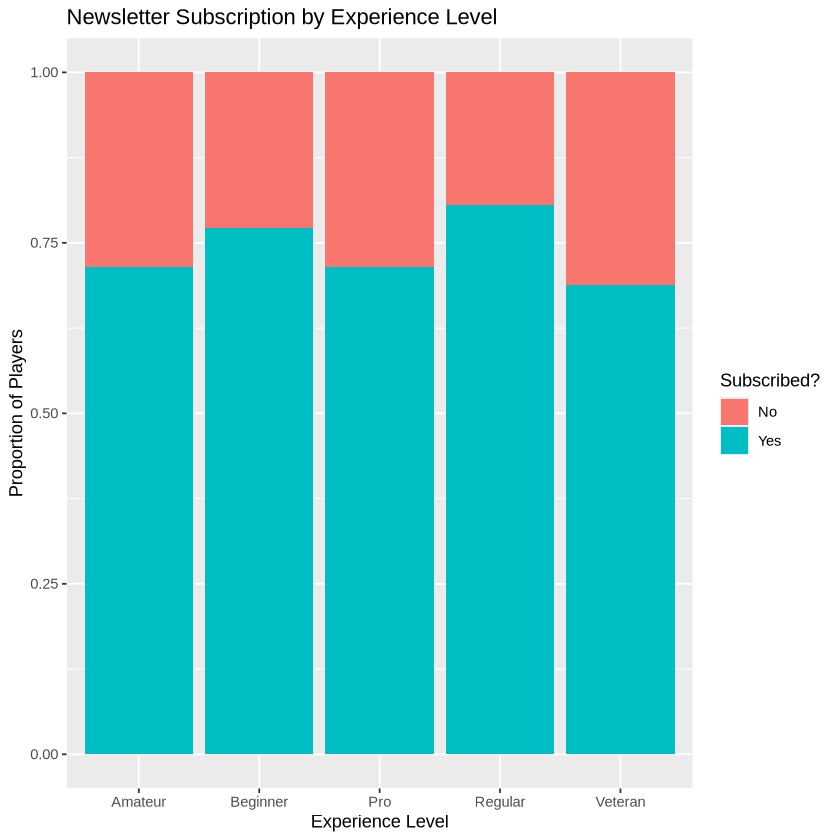

In [3]:

players <- players |>
  mutate(
    experience = factor(experience),
    gender = factor(gender),
    subscribe = factor(subscribe, levels = c(FALSE, TRUE), labels = c("No", "Yes"))
  )


ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Newsletter Subscription by Experience Level",
    x = "Experience Level",
    y = "Proportion of Players",
    fill = "Subscribed?"
  )


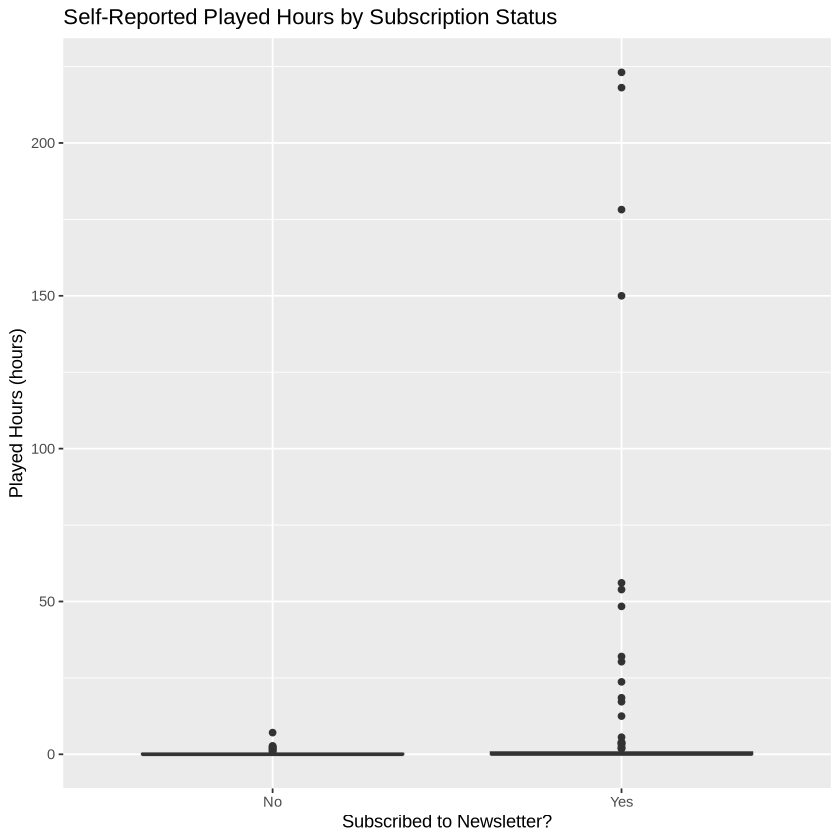

In [4]:

ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  coord_cartesian(ylim = c(0, NA)) +
  labs(
    title = "Self-Reported Played Hours by Subscription Status",
    x = "Subscribed to Newsletter?",
    y = "Played Hours (hours)"
  )


In my first plot, I showed that more experienced players are slightly more likely to subscribe to the newsletter.

My second plot shows a strong skew: whilst most players played <10 hours, a few outliers exceeded 100 hours, mostly of which were subscribers.

These two visualizations suggest that being experienced and having a longer playtime could predict a newsletter subscription

The missing age value may need to be removed before modelling.

I am planning on using the **k-Nearest Neigbours classification** model to help in predicting the newsletter subscription.

**Why it is appropriate:**
- Response variable (subscribe) is binary.
- The dataset is small enough for k-NN to work efficiently.
- k-NN can handle both categorical and numeric features after scaling and encoding.

**Assumptions:**
All the players who show similar characteristics should, in theory, have similar outcomes. Feature scaling is very important to prevent played_hours from dominating.

**Limitations:**
The k-NN model is very sensitive to outliers and offers low interpretability, possibility of performing poorly if one class dominates (for example, "YES").

**Planned process:**
- Fix missing age values.
- Scale the numeric variables.
- Split data 75/25 into training and testing sets.
- Use cross-validation on the training set to choose the best value for k
- Evaluate the precision and sensitivity on the test set.

**GitHub Repository:**
https://github.com/saahijgill11-arch/dsci100-mincraft-project 

The repository contains at least 5 commits which document my progress at each one of the stages:
- Initial setup and data loading
- Data description and 